In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.ops import clip_ops
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, PReLU, Dense, LSTM, multiply, concatenate, Activation
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot as plt #for imshow
from matplotlib.collections import PatchCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import Circle
import matplotlib.patches as mpatches
from scipy import signal
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D

C:\Users\nikon\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df1_tr = pd.read_csv('data383k_50_50_50_TRAIN.csv')
df1_val = pd.read_csv('data383k_50_50_50_VAL.csv')
df1_test = pd.read_csv('data383k_50_50_50_TEST.csv')
#Train set 
X_train = df1_tr.iloc[:,2:452].values
y_train = df1_tr.iloc[:,0].values

#Val set
X_val = df1_val.iloc[:,2:452].values
y_val = df1_val.iloc[:,0].values

#Test set
X_test = df1_test.iloc[:,2:452].values
y_test = df1_test.iloc[:,0].values


X_train = X_train.reshape(X_train.shape[0],1, 450)
X_test = X_test.reshape(X_test.shape[0], 1, 450)
X_val = X_val.reshape(X_val.shape[0],1, 450)

y_val = np_utils.to_categorical(y_val, 4)
y_test = np_utils.to_categorical(y_test, 4)
y_train = np_utils.to_categorical(y_train, 4)


MAX_SEQUENCE_LENGTH = 450
NB_CLASS = 4

def generate_model():
    ip = Input(shape=(1, MAX_SEQUENCE_LENGTH))

    x = LSTM(128)(ip)
    x = Dropout(0.5)(x)

    y = Permute((2, 1))(ip)
    y = Conv1D(128,10,padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(128,10, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x, y])

    out = Dense(NB_CLASS, activation='softmax')(x)

    model = Model(ip, out)

    #model.summary()

    # add load model code here to fine-tune

    return model

x = X_train
y = y_train

# 1st

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 1418s 5ms/step - loss: 0.7385 - acc: 0.6693 - val_loss: 0.7432 - val_acc: 0.6539
Epoch 2/90
270358/270358 [==============================] - 1398s 5ms/step - loss: 0.7123 - acc: 0.6831 - val_loss: 0.7401 - val_acc: 0.6649
Epoch 3/90
270358/270358 [==============================] - 1393s 5ms/step - loss: 0.7030 - acc: 0.6869 - val_loss: 0.8399 - val_acc: 0.6094
Epoch 4/90
270358/270358 [==============================] - 1394s 5ms/step - loss: 0.6969 - acc: 0.6900 - val_loss: 0.7277 - val_acc: 0.6603
Epoch 5/90
270358/270358 [==============================] - 1392s 5ms/step - loss: 0.6928 - acc: 0.6925 - val_loss: 0.6999 - val_acc: 0.6930
Epoch 6/90
270358/270358 [==============================] - 1401s 5ms/step - loss: 0.6895 - acc: 0.6929 - val_loss: 0.7241 - val_acc: 0.6737
Epoch 7/90
270358/270358 [==============================] - 1399s 5ms/step - loss: 0.6870 - acc: 0.6949

270358/270358 [==============================] - 1394s 5ms/step - loss: 0.5806 - acc: 0.7462 - val_loss: 0.8475 - val_acc: 0.6318
Epoch 59/90
270358/270358 [==============================] - 880s 3ms/step - loss: 0.5771 - acc: 0.7491 - val_loss: 1.0477 - val_acc: 0.5428
Epoch 60/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.5736 - acc: 0.7496 - val_loss: 0.7635 - val_acc: 0.6758
Epoch 61/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.5695 - acc: 0.7528 - val_loss: 0.7666 - val_acc: 0.6790
Epoch 62/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.5666 - acc: 0.7544 - val_loss: 0.7383 - val_acc: 0.6817
Epoch 63/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.5622 - acc: 0.7569 - val_loss: 0.7356 - val_acc: 0.6850
Epoch 64/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5584 - acc: 0.7593 - val_loss: 0.7387 - val_acc: 0.6876
Epoch 65/90
270358/27035

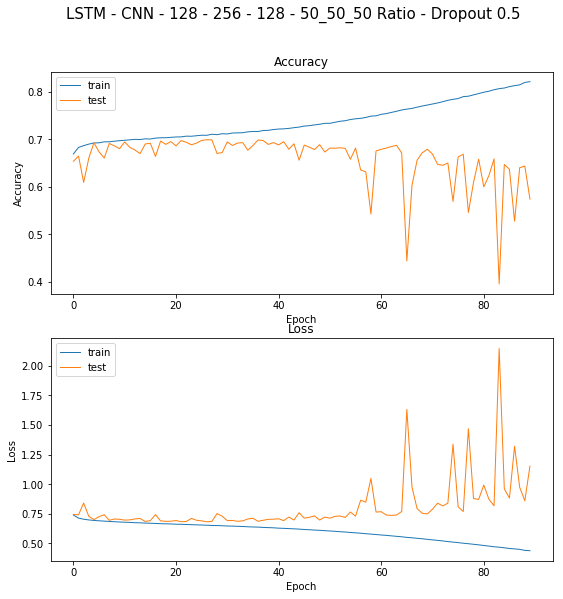

In [3]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 2nd

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.7377 - acc: 0.6710 - val_loss: 0.9492 - val_acc: 0.5569
Epoch 2/90
270358/270358 [==============================] - 763s 3ms/step - loss: 0.7128 - acc: 0.6831 - val_loss: 0.7522 - val_acc: 0.6667
Epoch 3/90
270358/270358 [==============================] - 762s 3ms/step - loss: 0.7026 - acc: 0.6878 - val_loss: 0.8375 - val_acc: 0.6118
Epoch 4/90
270358/270358 [==============================] - 763s 3ms/step - loss: 0.6965 - acc: 0.6910 - val_loss: 0.7848 - val_acc: 0.6433
Epoch 5/90
270358/270358 [==============================] - 763s 3ms/step - loss: 0.6929 - acc: 0.6924 - val_loss: 0.7756 - val_acc: 0.6488
Epoch 6/90
270358/270358 [==============================] - 763s 3ms/step - loss: 0.6892 - acc: 0.6931 - val_loss: 0.7013 - val_acc: 0.6799
Epoch 7/90
270358/270358 [==============================] - 763s 3ms/step - loss: 0.6865 - acc: 0.6952 - val_

270358/270358 [==============================] - 759s 3ms/step - loss: 0.5762 - acc: 0.7489 - val_loss: 0.7944 - val_acc: 0.6478
Epoch 59/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.5729 - acc: 0.7508 - val_loss: 0.9615 - val_acc: 0.6058
Epoch 60/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.5691 - acc: 0.7527 - val_loss: 1.0364 - val_acc: 0.5710
Epoch 61/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.5655 - acc: 0.7549 - val_loss: 0.9350 - val_acc: 0.6087
Epoch 62/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.5614 - acc: 0.7566 - val_loss: 0.7550 - val_acc: 0.6777
Epoch 63/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.5565 - acc: 0.7597 - val_loss: 0.7300 - val_acc: 0.6853
Epoch 64/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.5528 - acc: 0.7618 - val_loss: 0.7786 - val_acc: 0.6614
Epoch 65/90
270358/270358

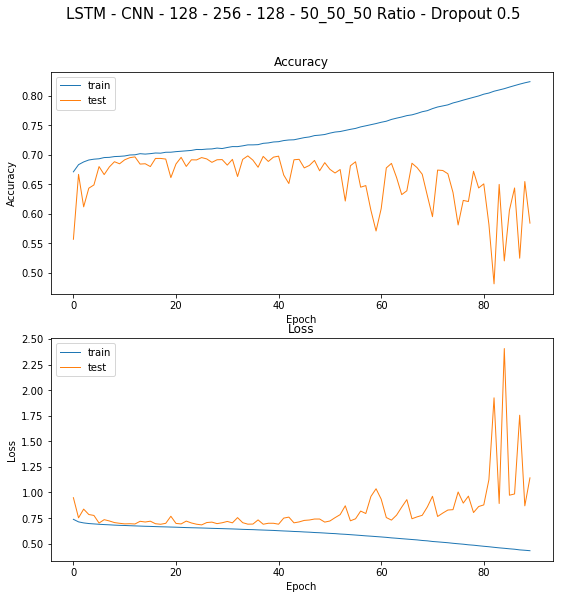

In [4]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 3rd

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.7375 - acc: 0.6701 - val_loss: 0.9405 - val_acc: 0.5453
Epoch 2/90
270358/270358 [==============================] - 751s 3ms/step - loss: 0.7119 - acc: 0.6831 - val_loss: 0.7623 - val_acc: 0.6610
Epoch 3/90
270358/270358 [==============================] - 751s 3ms/step - loss: 0.7027 - acc: 0.6871 - val_loss: 0.7471 - val_acc: 0.6604
Epoch 4/90
270358/270358 [==============================] - 751s 3ms/step - loss: 0.6972 - acc: 0.6904 - val_loss: 0.7340 - val_acc: 0.6665
Epoch 5/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.6935 - acc: 0.6917 - val_loss: 0.7302 - val_acc: 0.6649
Epoch 6/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.6895 - acc: 0.6927 - val_loss: 0.7159 - val_acc: 0.6730
Epoch 7/90
270358/270358 [==============================] - 751s 3ms/step - loss: 0.6864 - acc: 0.6946 - val_

Epoch 59/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5775 - acc: 0.7488 - val_loss: 0.9347 - val_acc: 0.5858
Epoch 60/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5734 - acc: 0.7518 - val_loss: 0.7496 - val_acc: 0.6735
Epoch 61/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5694 - acc: 0.7528 - val_loss: 0.7166 - val_acc: 0.6835
Epoch 62/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5664 - acc: 0.7548 - val_loss: 0.9702 - val_acc: 0.6027
Epoch 63/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5620 - acc: 0.7569 - val_loss: 0.8515 - val_acc: 0.6479
Epoch 64/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5585 - acc: 0.7594 - val_loss: 0.7750 - val_acc: 0.6754
Epoch 65/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.5545 - acc: 0.7611 - val_loss: 0.7381 - val_acc: 0.6745
Epoch 66/90
2

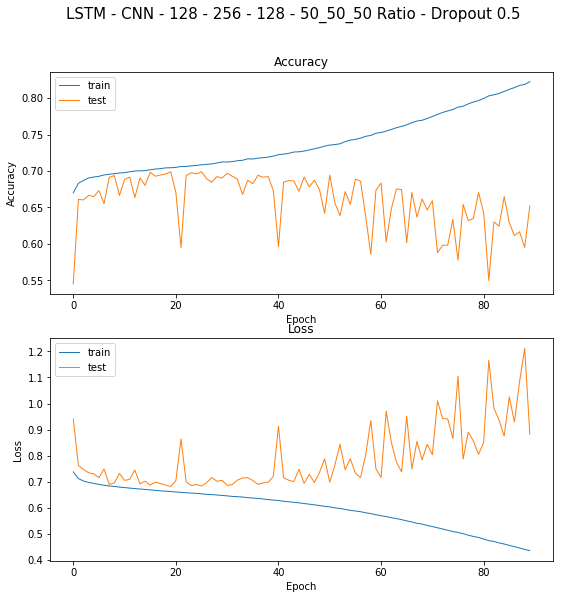

In [5]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 4th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.7371 - acc: 0.6707 - val_loss: 0.7688 - val_acc: 0.6330
Epoch 2/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.7114 - acc: 0.6833 - val_loss: 0.7359 - val_acc: 0.6726
Epoch 3/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.7024 - acc: 0.6876 - val_loss: 0.7338 - val_acc: 0.6628
Epoch 4/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.6970 - acc: 0.6903 - val_loss: 0.7786 - val_acc: 0.6524
Epoch 5/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.6928 - acc: 0.6926 - val_loss: 0.7475 - val_acc: 0.6437
Epoch 6/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.6894 - acc: 0.6934 - val_loss: 0.7006 - val_acc: 0.6902
Epoch 7/90
270358/270358 [==============================] - 752s 3ms/step - loss: 0.6869 - acc: 0.6945 - val_

270358/270358 [==============================] - 763s 3ms/step - loss: 0.5759 - acc: 0.7503 - val_loss: 0.8430 - val_acc: 0.6314
Epoch 59/90
270358/270358 [==============================] - 762s 3ms/step - loss: 0.5720 - acc: 0.7518 - val_loss: 0.7564 - val_acc: 0.6725
Epoch 60/90
270358/270358 [==============================] - 762s 3ms/step - loss: 0.5693 - acc: 0.7532 - val_loss: 0.8587 - val_acc: 0.6137
Epoch 61/90
270358/270358 [==============================] - 762s 3ms/step - loss: 0.5644 - acc: 0.7557 - val_loss: 0.7378 - val_acc: 0.6767
Epoch 62/90
270358/270358 [==============================] - 762s 3ms/step - loss: 0.5606 - acc: 0.7580 - val_loss: 0.7918 - val_acc: 0.6550
Epoch 63/90
270358/270358 [==============================] - 762s 3ms/step - loss: 0.5564 - acc: 0.7599 - val_loss: 1.0179 - val_acc: 0.5672
Epoch 64/90
270358/270358 [==============================] - 763s 3ms/step - loss: 0.5533 - acc: 0.7613 - val_loss: 0.7303 - val_acc: 0.6831
Epoch 65/90
270358/270358

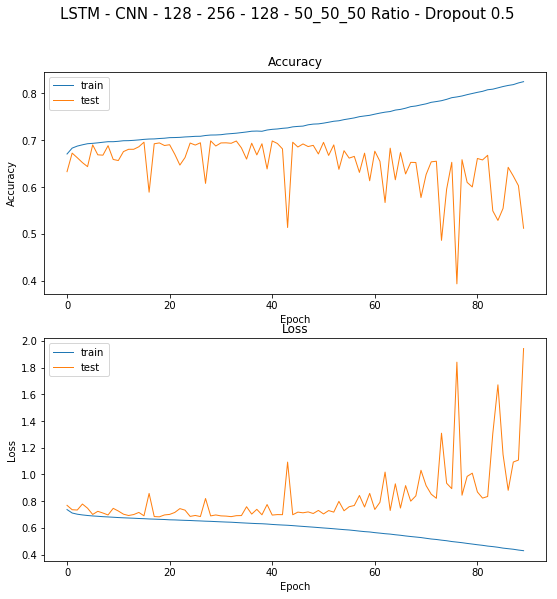

In [6]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 5th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 761s 3ms/step - loss: 0.7378 - acc: 0.6695 - val_loss: 0.7541 - val_acc: 0.6492
Epoch 2/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.7122 - acc: 0.6828 - val_loss: 0.7191 - val_acc: 0.6717
Epoch 3/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.7028 - acc: 0.6874 - val_loss: 0.7291 - val_acc: 0.6521
Epoch 4/90
270358/270358 [==============================] - 759s 3ms/step - loss: 0.6965 - acc: 0.6896 - val_loss: 0.7007 - val_acc: 0.6891
Epoch 5/90
270358/270358 [==============================] - 758s 3ms/step - loss: 0.6928 - acc: 0.6915 - val_loss: 0.8122 - val_acc: 0.6283
Epoch 6/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.6894 - acc: 0.6941 - val_loss: 0.7195 - val_acc: 0.6821
Epoch 7/90
270358/270358 [==============================] - 753s 3ms/step - loss: 0.6871 - acc: 0.6942 - val_

270358/270358 [==============================] - 765s 3ms/step - loss: 0.5805 - acc: 0.7464 - val_loss: 0.9086 - val_acc: 0.6055
Epoch 59/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.5755 - acc: 0.7496 - val_loss: 0.7602 - val_acc: 0.6636
Epoch 60/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.5726 - acc: 0.7506 - val_loss: 0.8565 - val_acc: 0.6320
Epoch 61/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.5680 - acc: 0.7531 - val_loss: 0.8140 - val_acc: 0.6512
Epoch 62/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.5645 - acc: 0.7566 - val_loss: 1.1422 - val_acc: 0.5075
Epoch 63/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.5604 - acc: 0.7576 - val_loss: 0.8032 - val_acc: 0.6736
Epoch 64/90
270358/270358 [==============================] - 765s 3ms/step - loss: 0.5575 - acc: 0.7594 - val_loss: 0.9496 - val_acc: 0.6011
Epoch 65/90
270358/270358

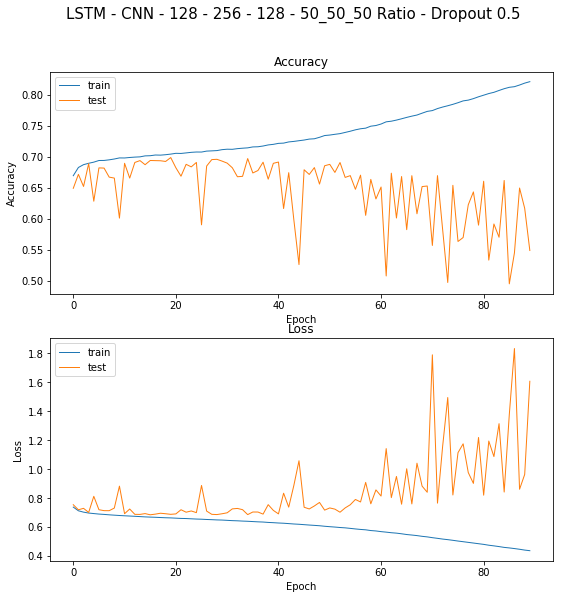

In [7]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 6th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 766s 3ms/step - loss: 0.7378 - acc: 0.6703 - val_loss: 0.7458 - val_acc: 0.6648
Epoch 2/90
270358/270358 [==============================] - 764s 3ms/step - loss: 0.7123 - acc: 0.6827 - val_loss: 0.7070 - val_acc: 0.6836
Epoch 3/90
270358/270358 [==============================] - 764s 3ms/step - loss: 0.7030 - acc: 0.6873 - val_loss: 0.7477 - val_acc: 0.6555
Epoch 4/90
270358/270358 [==============================] - 764s 3ms/step - loss: 0.6978 - acc: 0.6900 - val_loss: 0.7121 - val_acc: 0.6691
Epoch 5/90
270358/270358 [==============================] - 764s 3ms/step - loss: 0.6933 - acc: 0.6915 - val_loss: 0.6949 - val_acc: 0.6899
Epoch 6/90
270358/270358 [==============================] - 764s 3ms/step - loss: 0.6902 - acc: 0.6928 - val_loss: 0.7439 - val_acc: 0.6681
Epoch 7/90
270358/270358 [==============================] - 764s 3ms/step - loss: 0.6867 - acc: 0.6940 - val_

Epoch 59/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5786 - acc: 0.7484 - val_loss: 0.7270 - val_acc: 0.6793
Epoch 60/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5740 - acc: 0.7503 - val_loss: 0.7536 - val_acc: 0.6646
Epoch 61/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5710 - acc: 0.7517 - val_loss: 0.9453 - val_acc: 0.5931
Epoch 62/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5666 - acc: 0.7541 - val_loss: 0.7456 - val_acc: 0.6743
Epoch 63/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5627 - acc: 0.7561 - val_loss: 0.7788 - val_acc: 0.6650
Epoch 64/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5593 - acc: 0.7581 - val_loss: 1.3627 - val_acc: 0.4430
Epoch 65/90
270358/270358 [==============================] - 754s 3ms/step - loss: 0.5548 - acc: 0.7606 - val_loss: 0.7404 - val_acc: 0.6787
Epoch 66/90
2

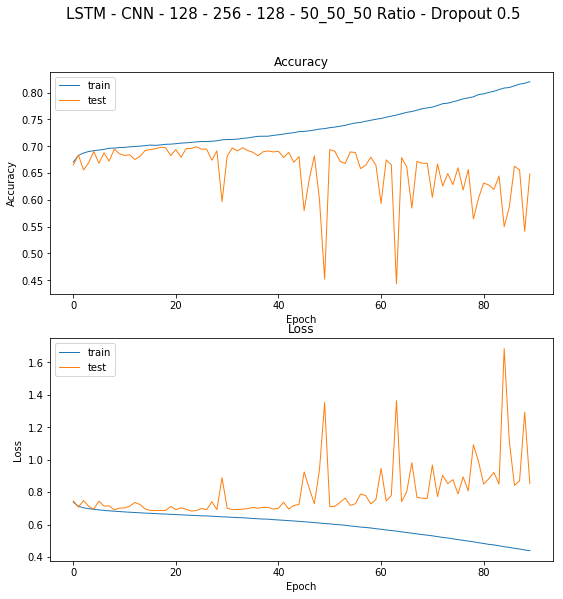

In [8]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 7th

In [9]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 40,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


Train on 270358 samples, validate on 57934 samples
Epoch 1/90
  5280/270358 [..............................] - ETA: 13:36 - loss: 0.8439 - acc: 0.6218

KeyboardInterrupt: 

# 8th

In [ ]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 9th

In [ ]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


# 10th

In [ ]:
model = generate_model()
optm = Adam(lr=1e-3)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

#filepath = "model_lstm383kRUN2_50_50_50-{epoch:02d}--{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
#cb = [checkpoint]
h = model.fit(X_train,y_train,
                             epochs = 90,
                             batch_size=32,
                             verbose = 1,
                             validation_data = (X_val,y_val))
                             #callbacks = cb)
    # 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuarcy:', str(score))

predictions = model.predict([X_test])

real_labels = np.argmax(y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('LSTM - CNN - 128 - 256 - 128 - 50_50_50 Ratio - Dropout 0.5', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


In [10]:
l1 = {0.6772,0.698,0.6872,0.6837,0.6973,0.6919}